In [1]:
import sys; sys.path.append("../src")
from indirect import Indirect
from optimisation import conds
import numpy as np, matplotlib.pyplot as plt
%matplotlib

Using matplotlib backend: Qt5Agg


In [2]:
# two boundary states
x0, xf = [[0,0,theta,0] for theta in [np.pi, 0]]
x0, xf

([0, 0, 3.141592653589793, 0], [0, 0, 0, 0])

In [3]:
# instantiate indirect segment
seg = Indirect(x0, xf)

In [ ]:
# encode duration and initial costates into decision vector
T, l0 = 5, np.random.uniform(-1,1,seg.xdim)
dv = seg.encode(T,l0)
dv

In [ ]:
# decode decision vector
seg.decode(dv)

In [ ]:
# propagate trajectory
tl, xl, ul = seg.propagate(T, l0, 1, controls=True)

In [ ]:
# plot trajectory
seg.plot_traj(xl, pts=True, arm=True, interp=True)

In [ ]:
# optimise trajectory
z, feas = seg.solve(0, verbose=True, Tlb=2, Tub=20)

In [ ]:
# plot optimal trajectory
tl, xl, ul = seg.propagate(*seg.decode(z), 0, controls=True)
ax = seg.plot_traj(xl, arm=False)
ax = seg.plot_timeline(tl, xl, ul)

In [ ]:
# perform homotopy
dvah = seg.homotopy(verbose=True, fname="homo")

In [4]:
# load homotopy sequence
dvah = np.load("homo.npy")

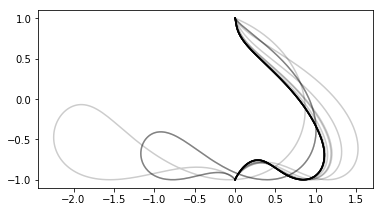

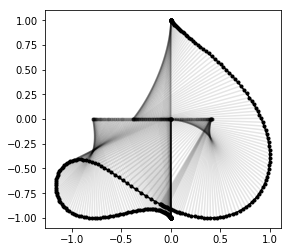

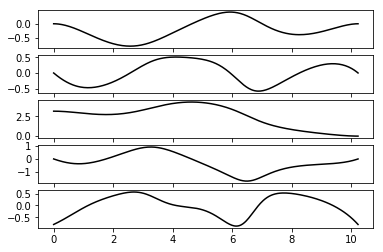

In [5]:
# plot homotopy sequence
ax = seg.plot_homotopy(dvah)
# plot optimal trajectory
tl, xl, ul = seg.propagate(*seg.decode(dvah[0,:-1]), 0, controls=True)
ax = seg.plot_traj(xl)
ax = seg.plot_timeline(tl, xl, ul)

In [ ]:
for cond in conds:
    try:
        dvah = np.load("../data/homotopy/" + str(cond) + ".npy")
        print(dvah[-1,0])
    except:
        continue
    seg = Indirect(*cond)
    seg.plot_homotopy(dvah)

In [ ]:
T

In [6]:
Tl, xl0l = seg.sample_traj(tl, xl, nn=5)

In [ ]:
dvl, x0l = seg.random_walk(Tl[0], xl0l[0,:], 0, verbose=True)

Beginning random walk from [0.         0.         3.14159265 0.         0.196329   0.7618853
 0.97665949 0.84056301]
Not feasible! dx now 0.005
Feasible! dx now 0.01
Feasible! dx now 0.02
Feasible! dx now 0.04
Feasible! dx now 0.08
Not feasible! dx now 0.04
Feasible! dx now 0.08
Not feasible! dx now 0.04
Not feasible! dx now 0.02
Feasible! dx now 0.04
Feasible! dx now 0.08
Feasible! dx now 0.16
Feasible! dx now 0.32
Feasible! dx now 0.64
Not feasible! dx now 0.32
Not feasible! dx now 0.16
Not feasible! dx now 0.08
Not feasible! dx now 0.04
Feasible! dx now 0.08
Feasible! dx now 0.16


In [ ]:
Tl